# CLASSIFICATION  - ASSIGNMENT - 1 - "Cancer Prediction"

AIMD hospital is a medical facility that has just hired an intern in the Machine Learning space due to the vast advancements of ML in the medical field. This facility has given the intern the data of 769 patients who have cancer and who have don’t have cancer. These patients have other conditions as well like past pregnancies, diabetes, insulin intake, etc. The doctors are hoping these attributes will help the intern learn & build a model to predict whether a patient is likely to have cancer or not based on certain attributes.

Assuming that you are the intern, you have to build a KNN classifier that will predict whether a patient is susceptible to cancer or not.  

You are expected to perform the following.

-  Exploratory Data Analysis on the dataset

- Building the KNN classifier

- Model performance Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Cancer_Dataset.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isna().any().any()

False

In [7]:
data.loc[:, data.isnull().any()].columns

Index([], dtype='object')

In [8]:
len(data[data.duplicated()])
# total number of duplicate values in the "data"

0

In [9]:
data.all()
#Returns True unless there at least one element within a series or along a Dataframe axis that is False or equivalent (e.g. zero or empty).
#that means the columns which have false in them have one or more zeros in it

Pregnancies       False
Glucose           False
BloodPressure     False
SkinThickness     False
Insulin           False
BMI               False
Cancer_Markers     True
Age                True
Outcome           False
dtype: bool

Columns with zero in it are "Pregnancies", "Glucose", "BloodPressure","SkinThickness","Insulin","BMI"

No zeros in columns "Age" and "Cancer_Markers" 

Zero as entry in columns "Glucose","BloodPressure", "SkinThickness","Insulin","BMI" does not mean anything as any human has to have some value

In [10]:
columns  = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
#Create a list so that the zero values in these columns can be replaced by the mean of that column

In [11]:
for column in columns:
    data[column]= data[column].replace(0,np.NaN)
    #o is replaced by nan so that mean can be calculated without 0 affecting it
    mean = int(data[column].mean(skipna = True))
    data[column] = data[column].replace(np.NaN, mean)
    #once mean is calculated this is used to replace all the nan values

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [13]:
data.all()
#Returns True unless there at least one element within a series or along a Dataframe axis that is False or equivalent (e.g. zero or empty).
#that means the columns which have false in them have one or more zeros in it

Pregnancies       False
Glucose            True
BloodPressure      True
SkinThickness      True
Insulin            True
BMI                True
Cancer_Markers     True
Age                True
Outcome           False
dtype: bool

<AxesSubplot:>

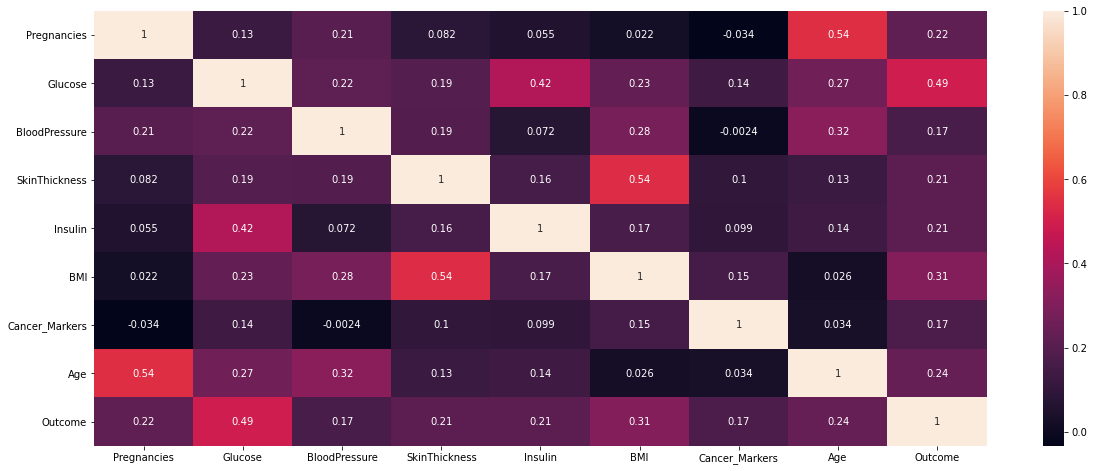

In [14]:
corelation = data.corr()
plt.rcParams['figure.figsize'] = [20,8]
sns.heatmap(corelation,xticklabels = corelation.columns,yticklabels= corelation.columns,annot = True)

In [15]:
from scipy import stats
z = np.array(stats.zscore(data))
#calculating the z score to check for outliers

In [16]:
threshold = 3
print(np.where(z > 3))
#if we consider the threshold to be 3 then all values with zscore more than 3 are considered as outliers

(array([  4,   8,  13,  43,  45,  57,  58,  88, 106, 111, 120, 120, 123,
       125, 153, 159, 177, 177, 186, 220, 228, 228, 247, 286, 298, 330,
       370, 370, 371, 392, 395, 409, 415, 445, 445, 445, 453, 455, 459,
       486, 549, 579, 584, 593, 621, 645, 655, 666, 673, 684, 691, 695,
       753], dtype=int64), array([6, 4, 4, 2, 6, 3, 6, 0, 2, 4, 3, 5, 7, 5, 4, 0, 2, 5, 4, 4, 4, 6,
       4, 4, 0, 6, 4, 6, 6, 4, 6, 4, 4, 3, 5, 6, 7, 0, 7, 4, 2, 3, 4, 6,
       6, 4, 4, 7, 5, 7, 2, 4, 4], dtype=int64))


In [17]:
data = data[(z < 3).all(axis=1)]
#removing all the outliers from the data

In [18]:
x = data.drop('Outcome',axis = 1)
y = data['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0, test_size = 0.1)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [32]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(x_train,y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test,y_test)
    test_accuracy[i]
    print('Accuracy for',i+1,'is',test_accuracy[i])

Accuracy for 1 is 0.7397260273972602
Accuracy for 2 is 0.7534246575342466
Accuracy for 3 is 0.7808219178082192
Accuracy for 4 is 0.821917808219178
Accuracy for 5 is 0.8356164383561644
Accuracy for 6 is 0.7945205479452054
Accuracy for 7 is 0.821917808219178
Accuracy for 8 is 0.7808219178082192
Accuracy for 9 is 0.8082191780821918
Accuracy for 10 is 0.8082191780821918
Accuracy for 11 is 0.821917808219178
Accuracy for 12 is 0.7945205479452054
Accuracy for 13 is 0.8082191780821918
Accuracy for 14 is 0.7945205479452054
Accuracy for 15 is 0.8082191780821918
Accuracy for 16 is 0.8082191780821918
Accuracy for 17 is 0.7945205479452054
Accuracy for 18 is 0.7945205479452054
Accuracy for 19 is 0.8082191780821918


In [33]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [34]:
from sklearn.metrics import accuracy_score 
y_pred = knn.predict(x_test) 
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.821917808219178


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm